In [113]:
#ucitavanej biblioteka

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [114]:
#ucitavanje anotacija i zadrzavanje samo onih koje se odnose na gene

# za koristenje treba promijeniti path!

from gtfparse import read_gtf

df = read_gtf("C:/Users/zg/Desktop/uzop/anotacije/anotacije.gtf")

df_genes = df[df["feature"] == "gene"]

print(df_genes)

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_status', 'gene_name', 'level', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_status', 'transcript_name', 'tag', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid']


        seqname   source feature  start    end  score strand frame  \
0          chr1   HAVANA    gene  11869  14409    NaN      +     0   
12         chr1   HAVANA    gene  14404  29570    NaN      -     0   
25         chr1  ENSEMBL    gene  17369  17436    NaN      -     0   
28         chr1   HAVANA    gene  29554  31109    NaN      +     0   
36         chr1  ENSEMBL    gene  30366  30503    NaN      +     0   
...         ...      ...     ...    ...    ...    ...    ...   ...   
2563652    chrM  ENSEMBL    gene  14149  14673    NaN      -     0   
2563657    chrM  ENSEMBL    gene  14674  14742    NaN      -     0   
2563660    chrM  ENSEMBL    gene  14747  15887    NaN      +     0   
2563665    chrM  ENSEMBL    gene  15888  15953    NaN      +     0   
2563668    chrM  ENSEMBL    gene  15956  16023    NaN      -     0   

                   gene_id                           gene_type  ...  \
0        ENSG00000223972.5  transcribed_unprocessed_pseudogene  ...   
12       ENSG0000

In [115]:
#spremanje anotacija gena
just_genes=df_genes[["gene_id","gene_name", "start", "end"]]

length=just_genes["end"]-just_genes["start"]
just_genes_final=just_genes[["gene_id","gene_name"]]
just_genes_final["length"]=length

just_genes_final.to_csv('anotations_check.csv',index=False)  

C:\Users\zg\AppData\Local\Temp/ipykernel_45388/3906930876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_genes_final["length"]=length


In [116]:
#ucitavanje metabolickih gena
# za koristenje treba promijeniti path!
mgenes=pd.read_csv('C:/Users/zg/Desktop/uzop/metabolicki_geni/mgen_final.csv', sep=',')
print(mgenes["Gene Symbol"])

0          ABCA1
1         ABCA10
2         ABCA12
3         ABCA13
4          ABCA2
          ...   
2747        PDXP
2748    PHOSPHO2
2749        PNPO
2750        DCXR
2751        XYLB
Name: Gene Symbol, Length: 2752, dtype: object


In [117]:
#ucitavanje icgc dataseta
# za koristenje treba promijeniti path!
exp_seq=pd.read_csv('C:/Users/zg/Desktop/uzop/icgc_dataset/exp_seq.tsv', sep='\t')
print(exp_seq)

        icgc_donor_id project_code icgc_specimen_id icgc_sample_id  \
0             DO50855      LIRI-JP         SP112300       SA595602   
1             DO50855      LIRI-JP         SP112300       SA595602   
2             DO50855      LIRI-JP         SP112300       SA595602   
3             DO50855      LIRI-JP         SP112300       SA595602   
4             DO50855      LIRI-JP         SP112300       SA595602   
...               ...          ...              ...            ...   
8342109       DO23508      LIRI-JP         SP191914       SA594394   
8342110       DO23508      LIRI-JP         SP191914       SA594394   
8342111       DO23508      LIRI-JP         SP191914       SA594394   
8342112       DO23508      LIRI-JP         SP191914       SA594394   
8342113       DO23508      LIRI-JP         SP191914       SA594394   

        submitted_sample_id          analysis_id gene_model         gene_id  \
0              RK326_Cancer  RK326_Cancer-rnaseq     RefSeq            MPP2   
1

In [118]:
#atributi icgc dataset-a
print("ATRIBUTI DATASET-A: ")
print(exp_seq.columns.values)


ATRIBUTI DATASET-A: 
['icgc_donor_id' 'project_code' 'icgc_specimen_id' 'icgc_sample_id'
 'submitted_sample_id' 'analysis_id' 'gene_model' 'gene_id'
 'normalized_read_count' 'raw_read_count' 'fold_change' 'assembly_version'
 'platform' 'total_read_count' 'experimental_protocol'
 'alignment_algorithm' 'normalization_algorithm'
 'other_analysis_algorithm' 'sequencing_strategy' 'raw_data_repository'
 'raw_data_accession' 'reference_sample_type']


In [119]:
#odabir samo bitnih stupaca
exp_seq_final=exp_seq[["icgc_donor_id", "gene_id", "raw_read_count"]]

In [120]:
#odbacivanje svih gena koji nisu metabolicki iz dataset-a
icgc_important_columns=exp_seq_final[exp_seq_final['gene_id'].isin(mgenes["Gene Symbol"])]
icgc_important_columns=icgc_important_columns.reset_index(drop=True)

In [121]:
#tpm, ne zeli se izvrsiti 1000000 redova i 2700 gena previse za probrojati koliko koji gen ima ocitanja
#za sada je za svaki gen koristeno da ima fiksnih 100 ocitanja

#TPM_i = 10^6 * (N_i / L_i) / [Σ_j (N_j / L_j)]  #TPM za i-ti redak dataset-a

#print(icgc_important_columns.columns)
#num_mgenes=len(mgenes["Gene Symbol"])
#print(num_mgenes)
#number_of_reads_per_gene=[]
#mgenes_list=mgenes["Gene Symbol"]

#print(number_of_reads_per_gene)
#number_of_reads=len(icgc_important_columns[icgc_important_columns['gene_id'].str.contains(mgenes_list[i])])

#num_rows=len(icgc_important_columns)
#number_of_reads_per_gene = pd.DataFrame(np.zeros((num_mgenes)))
#for i in range(num_rows):
#    row=icgc_important_columns.iloc[i]
#    gene_name=row[1]
#    for j in range(num_mgenes):
#        if(mgenes_list[j]==gene_name):   
#       number_of_reads_per_gene[0][j]=1000 number_of_reads_per_gene[0][j]+1

In [122]:
#TPM drugi pokusaj
#length=len(icgc_important_columns['raw_read_count'])
#sum_of_nl=0
#counter=0
#for i in range(length):
#    sum_of_nl=sum_of_nl+(1000/icgc_important_columns['raw_read_count'][i])
    
#for i in range(length):
#    icgc_important_columns['raw_read_count'][i]=1000000 * (1000 /icgc_important_columns['raw_read_count'][i]) / sum_of_nl

In [123]:
# ucitavanje i obrada tcgc dataseta
#dataset je bio razlomljen po folderima
#u svakom folderu se nalazi datoteka s podacima za jednog pacijenta
#u slijedecem dijelu koda se spremaju svi path-ovi datoteka i foldera
#takoder id svakog pacijenta(koji je jednak imenu foldera u kojem se file nalazi) se sprama u listu patient_ids 

# za koristenje treba promijeniti path!



import os
counter=0
directory="C:/Users/zg/Desktop/uzop/tcgc_dataset"
subfolders=[x[0] for x in os.walk(directory)]
files=[]
folders=[]
paths=[]
patient_ids=[]
for folder in subfolders:
    folders.append(folder)
    current_file=os.listdir(folder)


    if current_file[0].endswith('.tsv') :
        files.append(current_file[0])
    else:
        files.append(current_file[1])
    path=folders[-1]+'/'+str(files[-1])
    
    patient_id=folder.lstrip('\\' + directory)
    
    patient_ids.append(patient_id)
    paths.append(path)

del patient_ids[0] # brisanje imena pocetnog foldera    
del paths[0] ## brisanje imena pocetnog foldera (koji je inace jednak patient_id-u)

In [124]:
#probno ucitavanje prvog pacijenta i odbacivanje svih gena koji nisu metabolicki
patient0=pd.read_csv(paths[0],skiprows=[0,2,3,4,5], sep='\t')
patient0['patient_id'] = patient_ids[0]
tcgc_dataset=patient0[patient0['gene_name'].isin(mgenes["Gene Symbol"])]
tcgc_dataset.reset_index(drop=True, inplace=True)
print(tcgc_dataset)

                 gene_id gene_name       gene_type  unstranded  \
0     ENSG00000000419.13      DPM1  protein_coding         950   
1     ENSG00000001036.14     FUCA2  protein_coding        4855   
2     ENSG00000001084.13      GCLC  protein_coding        2023   
3      ENSG00000001561.7     ENPP4  protein_coding        1475   
4     ENSG00000001626.16      CFTR  protein_coding         150   
...                  ...       ...             ...         ...   
2578   ENSG00000277161.2      PIGW  protein_coding         372   
2579   ENSG00000277893.2    SRD5A2  protein_coding           5   
2580   ENSG00000278535.5    DHRS11  protein_coding         953   
2581   ENSG00000278540.5     ACACA  protein_coding        1851   
2582   ENSG00000284741.1    PDE11A  protein_coding           0   

      stranded_first  stranded_second  tpm_unstranded  fpkm_unstranded  \
0                443              507         46.5150          15.6717   
1               2742             2781        101.6739      

In [125]:
#ucitavanje jednog po jednog pacijenta i dodavanje u patient_just_metabolic0 tablicu

#treba minuta-dvije dok se se izvrsi
length=len(paths)
counter=0
for i in range(1, length-1):
    cur_patient=pd.read_csv(paths[i],skiprows=[0,2,3,4,5], sep='\t')
    cur_patient['patient_id'] = patient_ids[i]
    
    #print(counter)
    counter=counter+1
    cur_patient=cur_patient[cur_patient['gene_name'].isin(mgenes["Gene Symbol"])].reset_index()
    

    
    tcgc_dataset=pd.concat([patient_just_metabolic0, cur_patient], axis=0, ignore_index=True)

In [126]:
#odabir samo vaznih stupaca

tcgc_important_columns=tcgc_dataset[['gene_name', 'patient_id', 'tpm_unstranded']]
print(tcgc_important_columns)

        gene_name                            patient_id  tpm_unstranded
0            DPM1  0036fcec-eaed-430b-9a23-5efb2d2cc7f2         46.5150
1           FUCA2  0036fcec-eaed-430b-9a23-5efb2d2cc7f2        101.6739
2            GCLC  0036fcec-eaed-430b-9a23-5efb2d2cc7f2         13.8729
3           ENPP4  0036fcec-eaed-430b-9a23-5efb2d2cc7f2         18.7705
4            CFTR  0036fcec-eaed-430b-9a23-5efb2d2cc7f2          0.8917
...           ...                                   ...             ...
1095187      PIGW  ff12abd3-0f45-4063-afa7-fa5cad973159          6.7623
1095188    SRD5A2  ff12abd3-0f45-4063-afa7-fa5cad973159          6.3376
1095189    DHRS11  ff12abd3-0f45-4063-afa7-fa5cad973159          8.0389
1095190     ACACA  ff12abd3-0f45-4063-afa7-fa5cad973159         20.0236
1095191    PDE11A  ff12abd3-0f45-4063-afa7-fa5cad973159          0.0000

[1095192 rows x 3 columns]


In [127]:
#uskladivanje imena stupaca icgc dataseta sa tcgc datasetom
icgc_important_columns = icgc_important_columns.rename(columns={'gene_id': 'gene_name'})
icgc_important_columns = icgc_important_columns.rename(columns={'icgc_donor_id': 'patient_id'})
icgc_important_columns = icgc_important_columns.rename(columns={'raw_read_count': 'tpm_unstranded'})

In [128]:
#konacna tablica podataka
result = pd.concat([icgc_important_columns, tcgc_important_columns], ignore_index=True, sort=False)

#result.to_csv('all_patients_final.csv',index=False)  

print(result)

                                   patient_id gene_name  tpm_unstranded
0                                     DO50855     SGPP1     193710.0000
1                                     DO50855     ACCN1        289.0000
2                                     DO50855   SLC37A2      16555.0000
3                                     DO50855   SLC6A11      27485.0000
4                                     DO50855      DERA     130239.0000
...                                       ...       ...             ...
2184969  ff12abd3-0f45-4063-afa7-fa5cad973159      PIGW          6.7623
2184970  ff12abd3-0f45-4063-afa7-fa5cad973159    SRD5A2          6.3376
2184971  ff12abd3-0f45-4063-afa7-fa5cad973159    DHRS11          8.0389
2184972  ff12abd3-0f45-4063-afa7-fa5cad973159     ACACA         20.0236
2184973  ff12abd3-0f45-4063-afa7-fa5cad973159    PDE11A          0.0000

[2184974 rows x 3 columns]


In [130]:
#pyComBat korekcija podataka
#baca error da ne moze allocirati toliko memorije
#from combat.pycombat import pycombat

#result_corrected = pycombat(result.drop(columns=["tpm_unstranded"]).transpose(), result["tpm_unstranded"]).transpose()
#print(result_corrected)

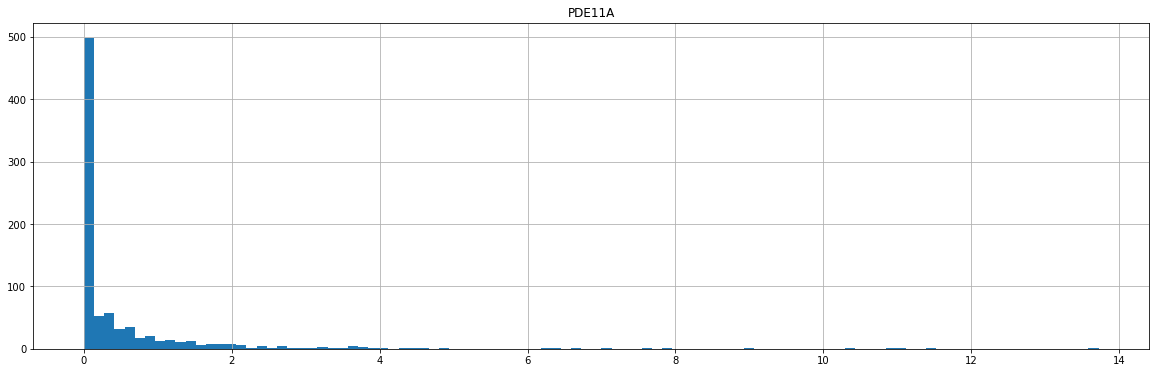

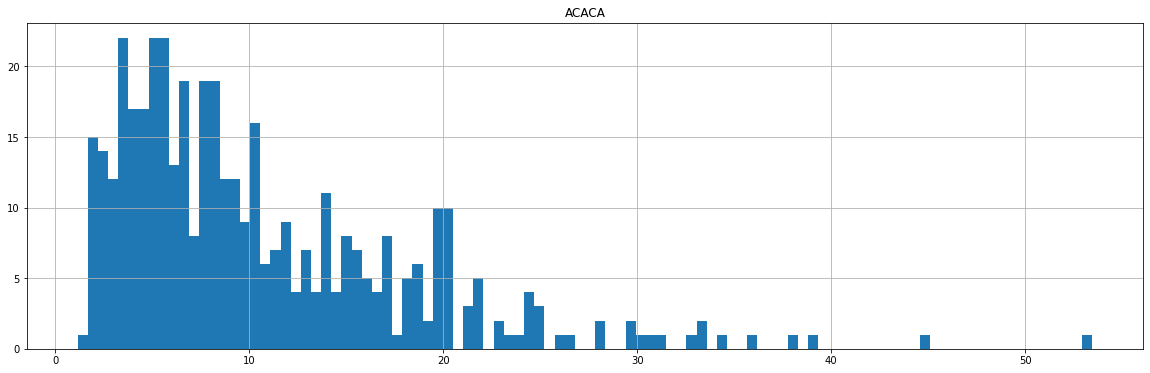

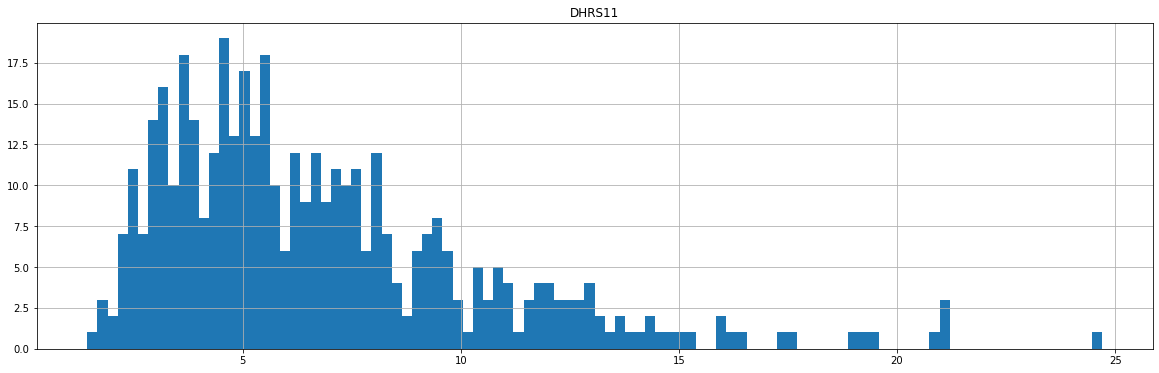

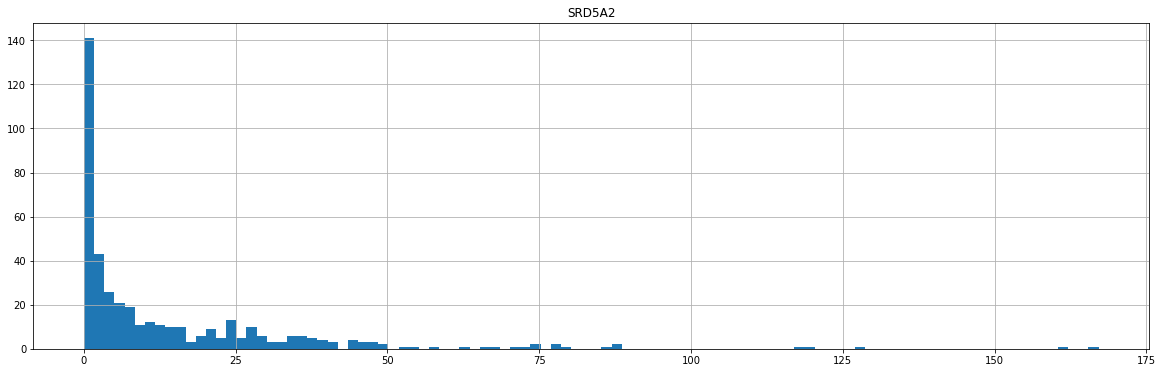

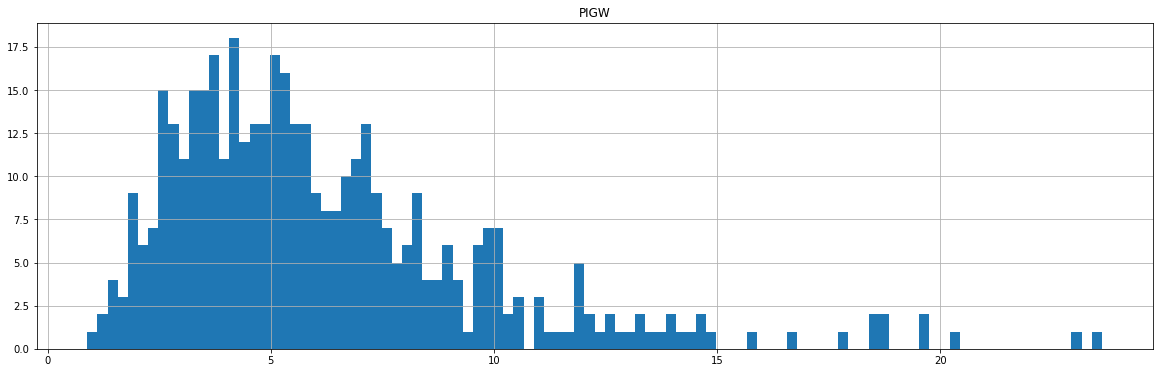

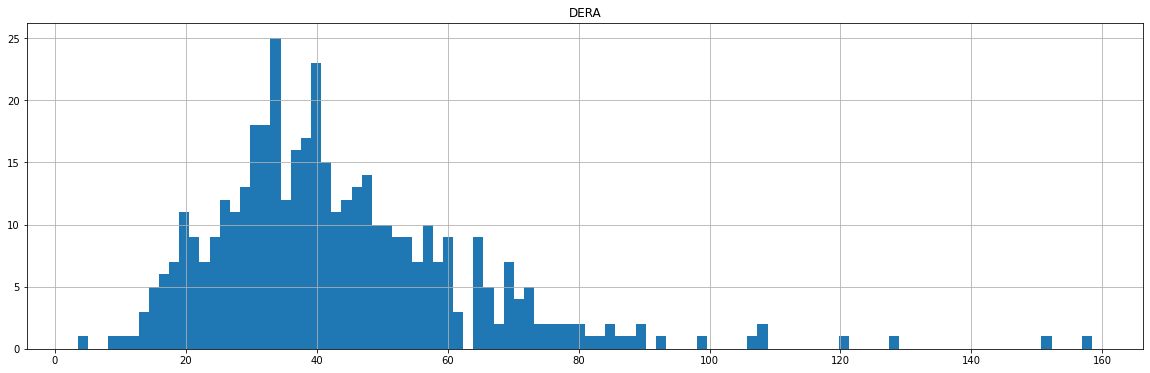

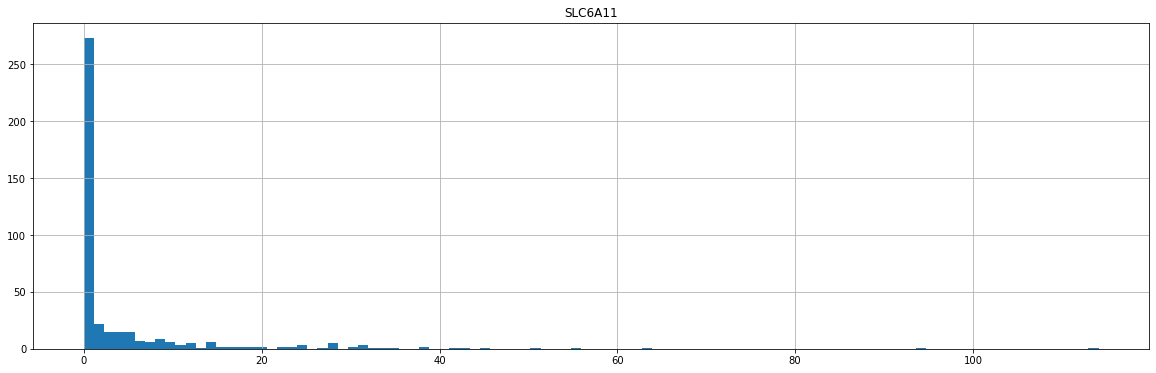

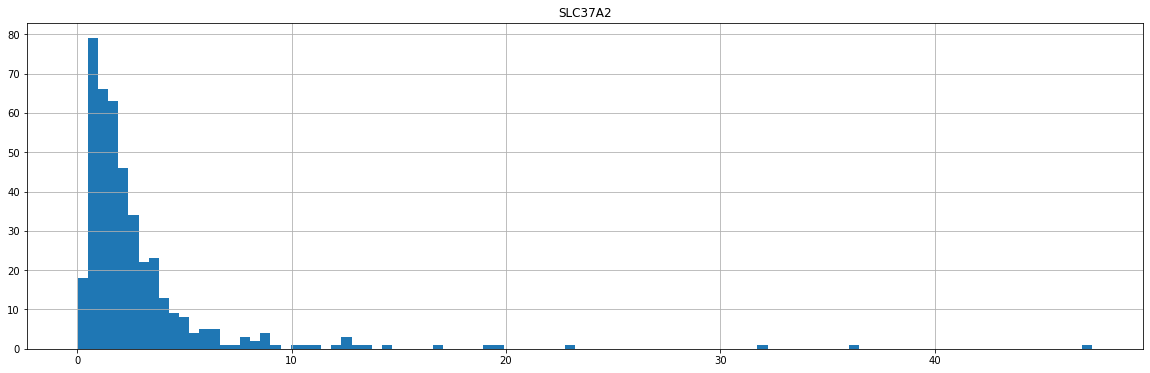

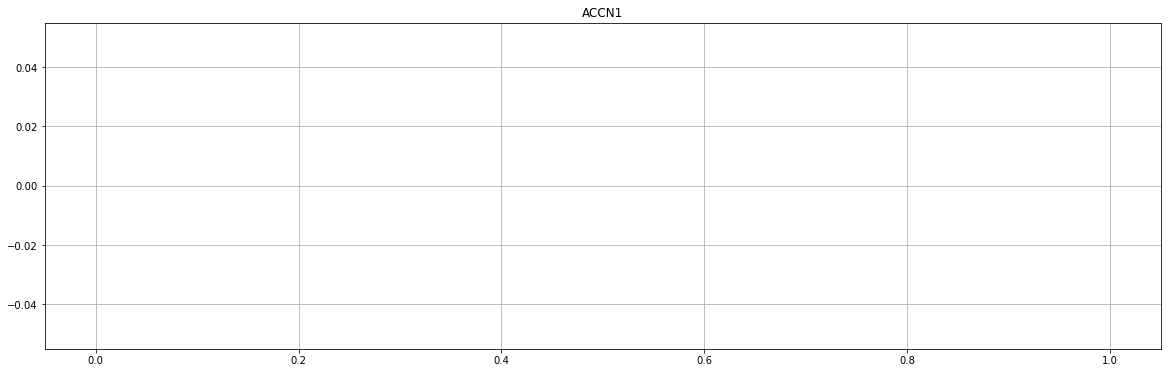

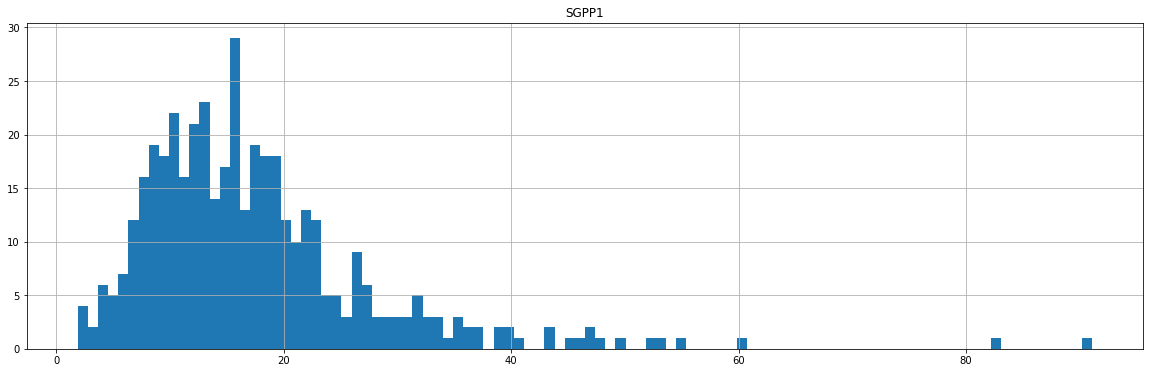

In [177]:
#histogramski prikaz nekih gena u odnosu na njihove duljine za icgc dataset
some_genes=['PDE11A', 'ACACA', 'DHRS11', 'SRD5A2','PIGW','DERA','SLC6A11','SLC37A2','ACCN1','SGPP1']
for i in some_genes:
    tpm=tcgc_important_columns.loc[tcgc_important_columns['gene_name'] == i]['tpm_unstranded']
    tpm = tpm.reset_index()
    tpm=tpm.drop(columns=['index'])
    tpm = tpm.rename(columns={'tpm_unstranded': i})
    hist = tpm.hist(bins=100, figsize=(20,6))

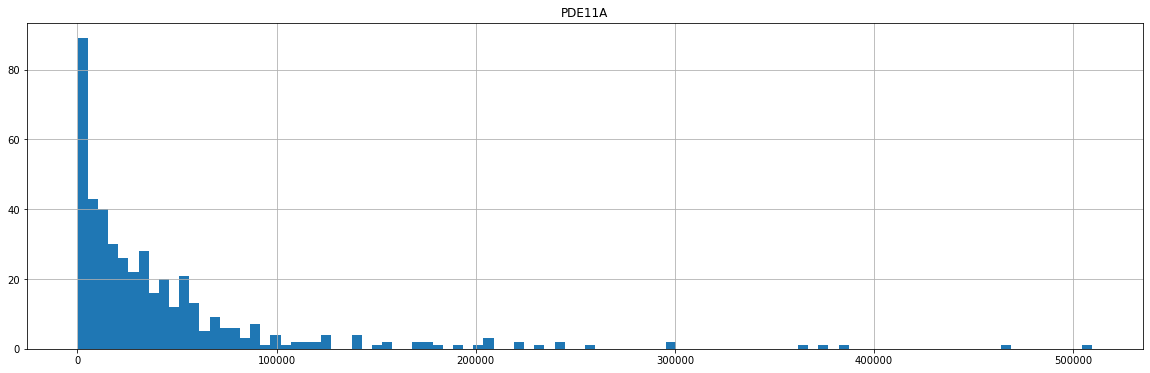

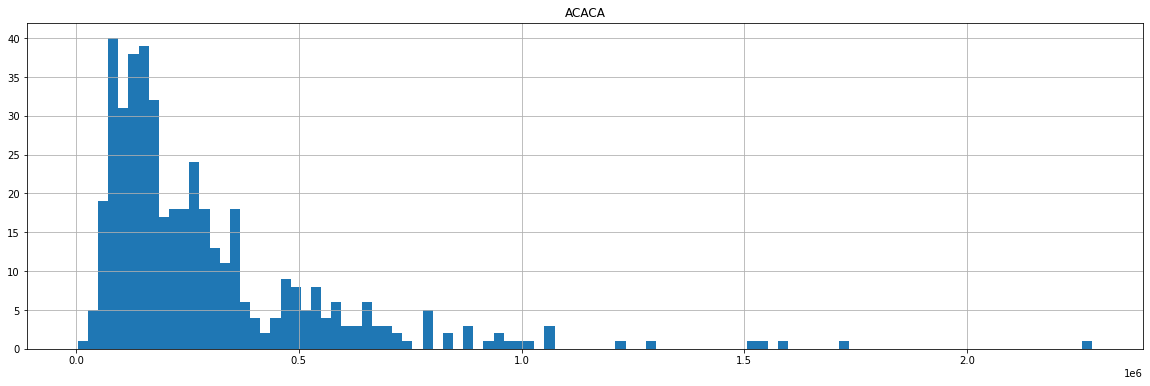

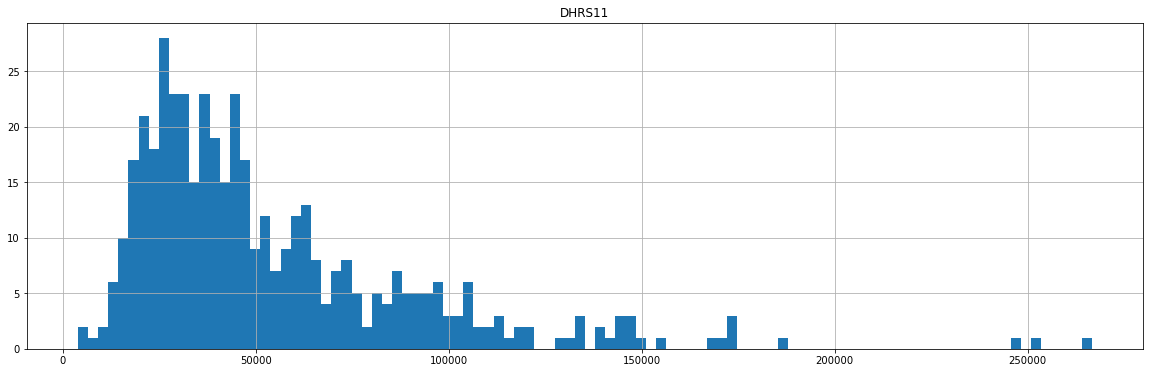

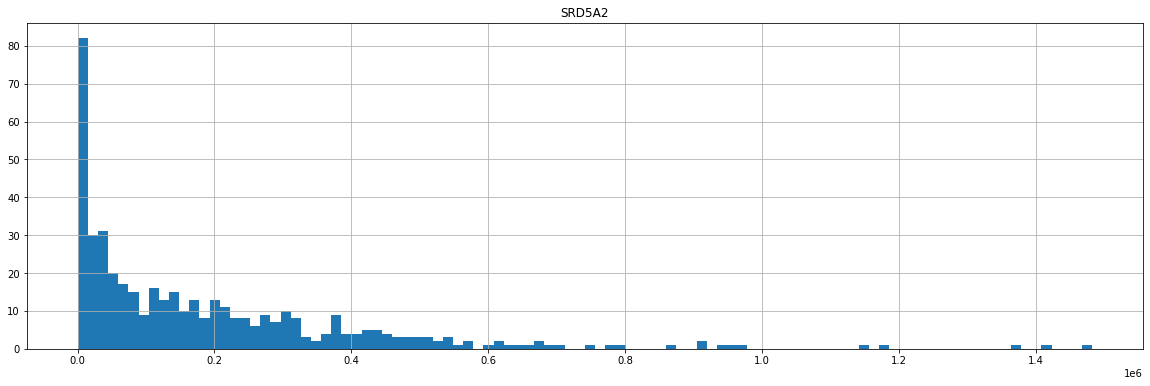

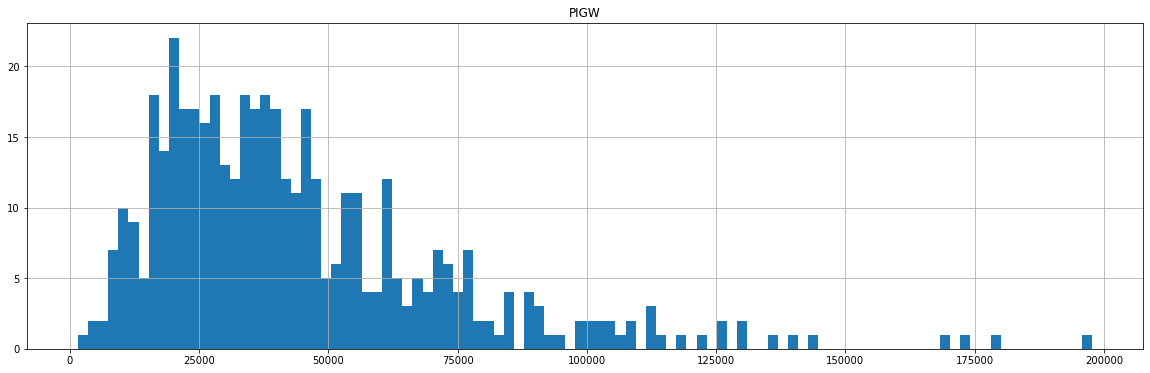

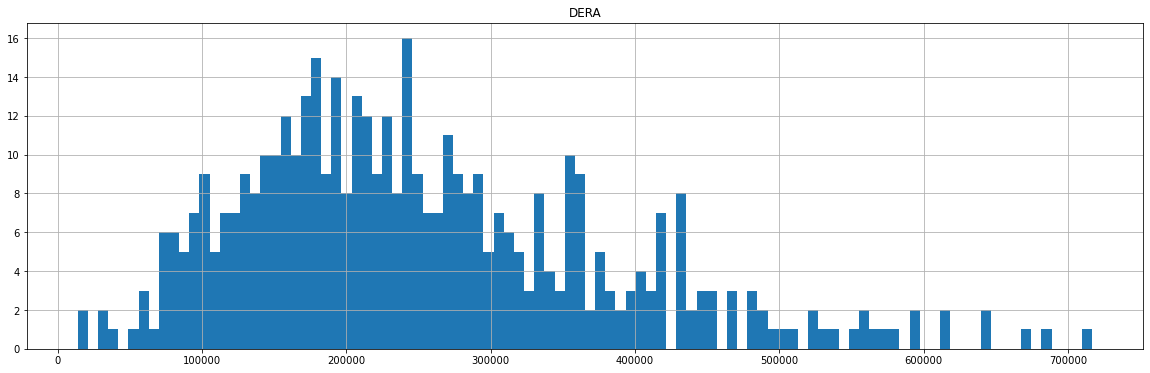

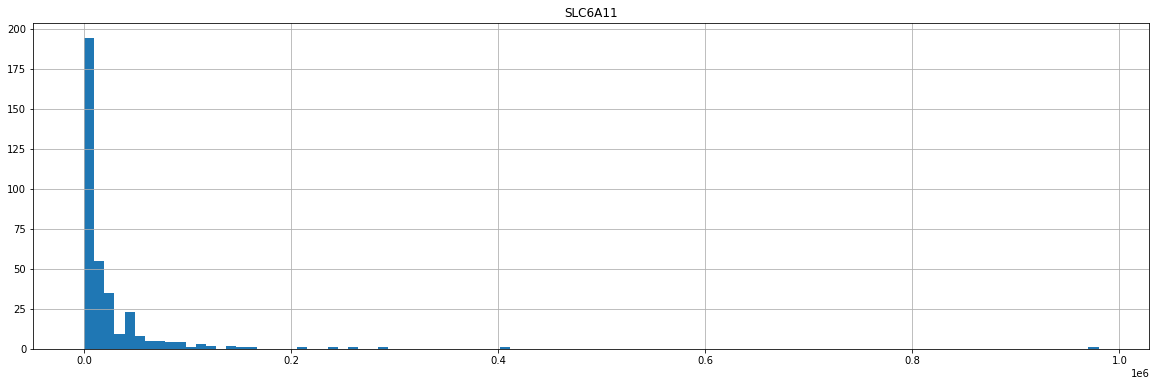

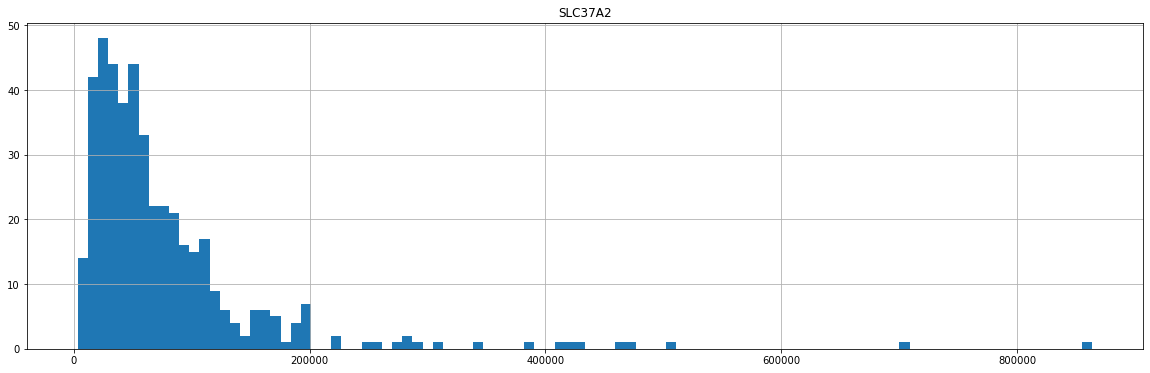

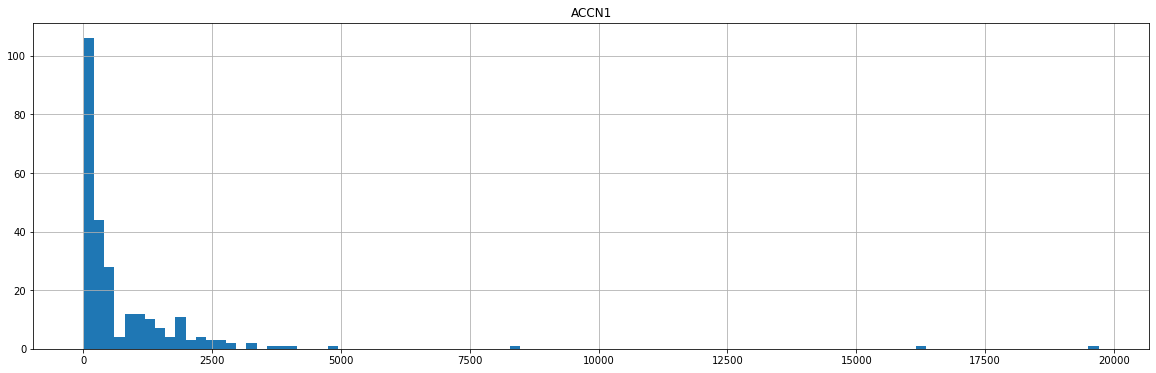

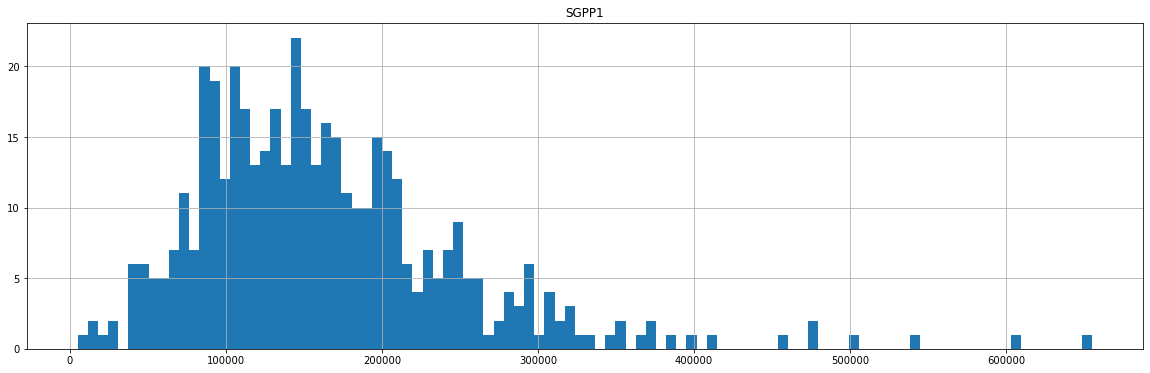

In [178]:
#histogramski prikaz nekih gena u odnosu na tpm za tcgc dataset
some_genes=['PDE11A', 'ACACA', 'DHRS11', 'SRD5A2','PIGW','DERA','SLC6A11','SLC37A2','ACCN1','SGPP1']
for i in some_genes:
    tpm=icgc_important_columns.loc[icgc_important_columns['gene_name'] == i]['tpm_unstranded']
    tpm = tpm.reset_index()
    tpm=tpm.drop(columns=['index'])
    tpm = tpm.rename(columns={'tpm_unstranded': i})
    hist = tpm.hist(bins=100, figsize=(20,6))